In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# IMPORT THE FILE

In [3]:
# Import the integrated review file for OH Yelp data
reviews_combined = pd.read_csv('./data_for_model.csv') 

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# CLEAN THE REVIEW DATA FRAME 

In [5]:
# check the shape
reviews_combined.shape

(321345, 44)

In [6]:
reviews_combined.head(1)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,earliest_to_latest,earliest_to_latest_years,useful_business_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments,totalwords,elite_yes_no
0,0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,...,1818 days 03:42:55.000000000,4.98,54,13,0,None,0,0,263,0


In [7]:
reviews = reviews_combined.drop(reviews_combined.columns[0], axis=1)
reviews.head(1)                                           

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,...,earliest_to_latest,earliest_to_latest_years,useful_business_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments,totalwords,elite_yes_no
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,2015-01-18 14:04:18,...,1818 days 03:42:55.000000000,4.98,54,13,0,None,0,0,263,0


In [8]:
# CHANGE THE TARGET LABELS

In [9]:
# 1. Create a new column indicating star classification
def star_classification (i):
    if i == 1:
        return  1
    elif i== 5:
        return 2
    else:
        return 3
reviews['star_grouping'] = reviews['stars'].apply(star_classification)

In [10]:
# ADD REVIEW COUNT BY BUSINESS

In [11]:
# Add business review count as a metric in an updated version of the review dataframe
business_count = pd.DataFrame(reviews.groupby('business_id').business_id.count())
business_count.columns = ['business_review_count']
business_count.reset_index()
# merge this into the business_all_df dataframe
reviews = reviews.merge(business_count, on='business_id', how='left')
reviews.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,...,useful_business_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments,totalwords,elite_yes_no,star_grouping,business_review_count
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,2015-01-18 14:04:18,...,54,13,0,None,0,0,263,0,3,60


In [12]:
# ESTABLISH BASELINE 

In [13]:
# Counts
reviews['star_grouping'].value_counts()

3    141803
2    131987
1     47555
Name: star_grouping, dtype: int64

In [14]:
# New Baseline accuracy rate
141803/ len(reviews)
# This is the percent of reviews that are not either a '1' or '5'

0.44127962159050244

In [16]:
# CHECK DTYPES
reviews.dtypes

review_id                        object
user_id                          object
business_id                      object
stars                             int64
useful                            int64
funny                             int64
cool                              int64
text                             object
date                             object
datetime                         object
year                              int64
is_it_a_one                       int64
is_it_a_five                      int64
is_it_a_one_or_two                int64
is_it_a_four_or_five              int64
is_it_a_one_or_five               int64
name_business_id                 object
city                             object
state                            object
latitude                        float64
longitude                       float64
stars_for_business_id           float64
review_count_for_business_id      int64
is_open                           int64
lat_lon_cluster                   int64


In [17]:
# 1. LOGISTICAL REGRESSION  - USERS & BUSINESS COUNT AS FEATURES

In [18]:
# Create list of featues
feature_cols = ['review_count_user_id', 'business_review_count']
X = reviews[feature_cols]

# Set the target
y = reviews.star_grouping

# Import the class
from sklearn.linear_model import LogisticRegression

# Import train test learn
from sklearn.model_selection import train_test_split

# Split the data. Note random state is set to none so the test data will keep changing each time the model is run 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=99)


In [19]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# Instantiate the estimator
lr = LogisticRegression()

# Fit the train data to the model
lr.fit(x_train,y_train)

# generate predicted values for test data
y_pred = lr.predict(x_test)


/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
# Accuracy Score
from sklearn import metrics
y_pred_class = lr.predict(x_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.5008791174594284


In [22]:
# Baseline Accuracy for Test group
most_freq_class = y_train.value_counts().index[0]
print(y_train.value_counts())
print(most_freq_class)
y_test.value_counts()[most_freq_class] / len(y_test)

3    113477
2    105648
1     37951
Name: star_grouping, dtype: int64
3


0.44074125939410913

In [23]:
# Import the confusion matrix class 
from sklearn.metrics import confusion_matrix

# Fit the y_pred values to the confusion matrix to measure accuracy 
confusion_matrix(y_test, y_pred)

array([[    0,  7968,  1636],
       [    0, 17005,  9334],
       [    0, 13140, 15186]])

In [24]:
# 2. LOGISTICAL REGRESSION  - ONLY USER REVIEW COUNT AS FEATURE 

In [25]:
# Create list of featues
feature_cols = ['review_count_user_id']
X = reviews[feature_cols]

# Set the target
y = reviews.star_grouping

# Import the class
from sklearn.linear_model import LogisticRegression

# Import train test learn
from sklearn.model_selection import train_test_split

# Split the data. Note random state is set to none so the test data will keep changing each time the model is run 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=99)


In [26]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
# Instantiate the estimator
lr = LogisticRegression()

# Fit the train data to the model
lr.fit(x_train,y_train)

# generate predicted values for test data
y_pred = lr.predict(x_test)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [28]:
# Accuracy Score
from sklearn import metrics
y_pred_class = lr.predict(x_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.5046756601160747


In [29]:
# KNN

In [30]:
# Create list of featues
feature_cols = ['review_count_user_id', 'business_review_count']
X = reviews[feature_cols]

# Set the target
y = reviews.star_grouping


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=99)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 30.

k_range = list(range(1, 30))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

    training error  testing error
K                                
29        0.554781       0.493099
28        0.555624       0.494437
27        0.556069       0.494671
26        0.557759       0.496569
25        0.558415       0.494624
24        0.559305       0.495900
23        0.559775       0.496056
22        0.560569       0.497394
21        0.561033       0.497954
20        0.560068       0.498919
19        0.560161       0.499261
18        0.560958       0.500288
17        0.560917       0.499199
16        0.561534       0.500272
15        0.560488       0.503353
14        0.561403       0.504613
13        0.558761       0.504567
12        0.566317       0.510448
11        0.559766       0.510853
10        0.645123       0.515132
9         0.641090       0.515567
8         0.634713       0.522227
7         0.635619       0.520795
6         0.635432       0.534254
5         0.632557       0.534472
4         0.636397       0.545706
3         0.549497       0.554326
2         0.63

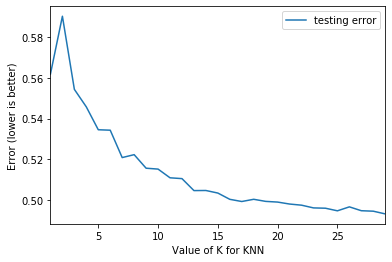

In [34]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df
print(df.to_string())

# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df
print(df.to_string())

# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [35]:
# Find the minimum testing error and the associated K value.
df_test_error = df.sort_values('testing error')
print(df_test_error.to_string())

    training error  testing error
K                                
29        0.554781       0.493099
28        0.555624       0.494437
25        0.558415       0.494624
27        0.556069       0.494671
24        0.559305       0.495900
23        0.559775       0.496056
26        0.557759       0.496569
22        0.560569       0.497394
21        0.561033       0.497954
20        0.560068       0.498919
17        0.560917       0.499199
19        0.560161       0.499261
16        0.561534       0.500272
18        0.560958       0.500288
15        0.560488       0.503353
13        0.558761       0.504567
14        0.561403       0.504613
12        0.566317       0.510448
11        0.559766       0.510853
10        0.645123       0.515132
9         0.641090       0.515567
7         0.635619       0.520795
8         0.634713       0.522227
6         0.635432       0.534254
5         0.632557       0.534472
4         0.636397       0.545706
3         0.549497       0.554326
1         0.63

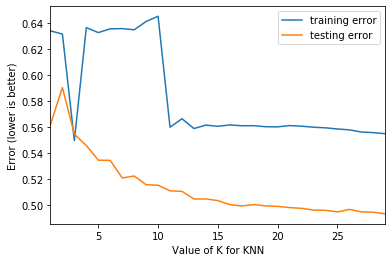

In [38]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [109]:
# Accuracy score n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# accuracy = the correct number of predictions divided by the total predictions made
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.4449976660961568


In [66]:
# KNN - WITH RANDOM SELECTED WHITTLED DOWN DATA SET TO IMPROVE SPEED OF PROCESSING

In [99]:
reviews_random = reviews.sample(frac=.1, replace=True, random_state=99)

# Create list of featues
feature_cols = ['review_count_user_id', 'business_review_count']
X = reviews_random[feature_cols]

# Set the target
y = reviews_random.star_grouping

In [100]:
len(X)

32134

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=99)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [102]:
# Get a benchmark for n_neighbors =1
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train, y_train)

# accuracy = the correct number of predictions divided by the total predictions made
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.49992220320522796


In [103]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 30.

k_range = list(range(1, 30))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

    training error  testing error
K                                
29        0.556949       0.503812
28        0.557571       0.504123
27        0.556358       0.503190
26        0.541669       0.500545
25        0.556109       0.505524
24        0.547520       0.508169
23        0.557354       0.507546
22        0.547333       0.510036
21        0.557478       0.516260
20        0.559034       0.514548
19        0.558629       0.516104
18        0.558567       0.518438
17        0.558723       0.521239
16        0.555331       0.517193
15        0.556078       0.521705
14        0.553059       0.524662
13        0.555735       0.527929
12        0.539989       0.527462
11        0.550445       0.528240
10        0.522966       0.526684
9         0.550352       0.529018
8         0.522468       0.528707
7         0.538993       0.527618
6         0.505104       0.544733
5         0.520850       0.544266
4         0.519076       0.546445
3         0.539771       0.555002
2         0.50

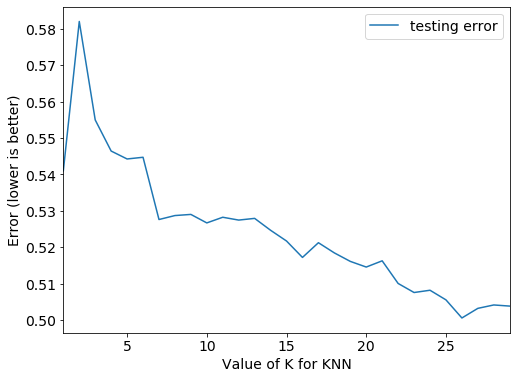

In [104]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df
print(df.to_string())

# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df
print(df.to_string())

# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [105]:
# Find the minimum testing error and the associated K value.
df_test_error = df.sort_values('testing error')
print(df_test_error.to_string())

    training error  testing error
K                                
26        0.541669       0.500545
27        0.556358       0.503190
29        0.556949       0.503812
28        0.557571       0.504123
25        0.556109       0.505524
23        0.557354       0.507546
24        0.547520       0.508169
22        0.547333       0.510036
20        0.559034       0.514548
19        0.558629       0.516104
21        0.557478       0.516260
16        0.555331       0.517193
18        0.558567       0.518438
17        0.558723       0.521239
15        0.556078       0.521705
14        0.553059       0.524662
10        0.522966       0.526684
12        0.539989       0.527462
7         0.538993       0.527618
13        0.555735       0.527929
11        0.550445       0.528240
8         0.522468       0.528707
9         0.550352       0.529018
1         0.525829       0.540999
5         0.520850       0.544266
6         0.505104       0.544733
4         0.519076       0.546445
3         0.53

In [106]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.5005445775634043, 26)

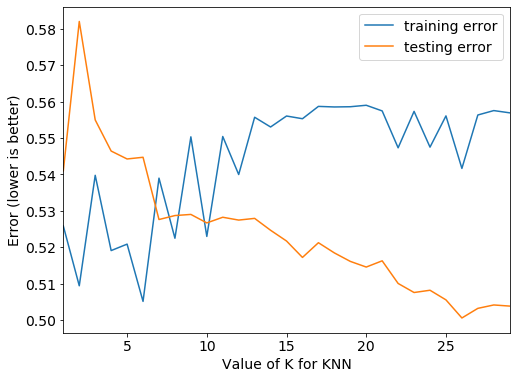

In [107]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [113]:
# Get a benchmark for n_neighbors11
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

# accuracy = the correct number of predictions divided by the total predictions made
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.4712929827291116


In [17]:
# NEURAL NETWORKS 

In [18]:
# Whittle down the feature set
data_all = reviews[['star_grouping', 'review_count_user_id', 'business_review_count', 'friend_count', 'useful', 'is_open', 'lat_lon_cluster', 'elite_yes_no', 'totalwords' ]]

In [19]:
# TAKE 10% OF THE ROWS
data = data_all.sample(frac=.1, replace=True, random_state=99)
len(data)

32134

In [20]:
# CHECK THE SHAPE
data.shape

(32134, 9)

In [21]:
# Import Keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras import losses

import pandas as pd

%matplotlib inline

Using TensorFlow backend.
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hanhuang/opt/anaconda3/lib/p

In [55]:
# Select the features
X = data.drop('star_grouping', axis=1)
# Select the target
y = data['star_grouping']

# Instantiate test, train, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

# Scale the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Encode categorical labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [56]:
y_train.shape

(25707,)

In [57]:
y_train

160356    1
225326    2
214910    2
78526     3
238556    3
         ..
149520    1
251506    2
135892    1
14807     3
309458    1
Name: star_grouping, Length: 25707, dtype: int64

In [58]:
y_train.value_counts()

3    11351
2    10691
1     3665
Name: star_grouping, dtype: int64

In [59]:
y_train_one_hot

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [60]:
y_train_one_hot.shape

(25707, 4)

In [61]:
y_test_one_hot

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [54]:
y_train_one_hot = np.delete(y_train_one_hot, [0], axis=1)
y_train_one_hot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [62]:
y_test_one_hot = np.delete(y_test_one_hot, [0], axis=1)
y_test_one_hot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [63]:
# Insert the model 
n_input = X_train.shape[1]
n_input

8

In [64]:
# Instantiate the class
model = Sequential([Dense(8, input_shape = (n_input,)), Activation('relu'), Dense(1), Activation('softmax')])
#model = Sequential()
#model.add(Dense(8, input_dim = n_input, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation= 'softmax'))

In [65]:
# Compile
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['acc'])

In [68]:
# Fit it
history = model.fit(
    X_train,
    y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    epochs=100,
    batch_size=None,
    verbose=2
)

ValueError: Error when checking target: expected activation_4 to have shape (1,) but got array with shape (4,)

In [22]:
df_predictions = model.predict(X_test, verbose=1)

6427/6427 [==============================] - 0s 9us/step


In [126]:
data_w_pred = zip(data, df_predictions)

In [127]:
#data_w_pred.head()
data_w_pred

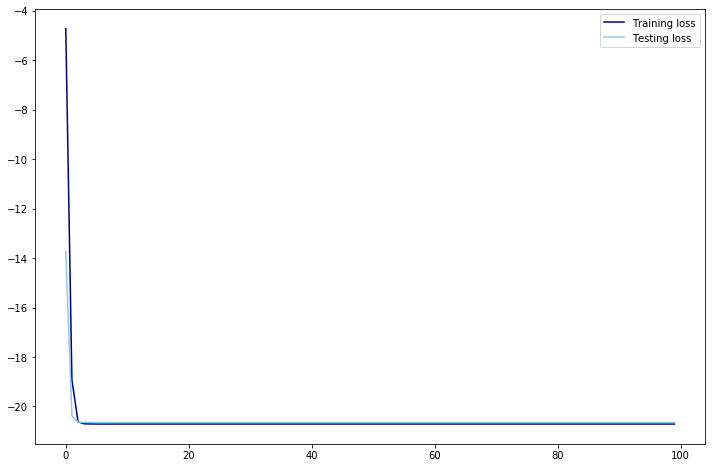

In [128]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [129]:
history.history['acc'][-1], history.history['val_acc'][-1]

(0.14256817, 0.1510813683271408)

In [130]:
# Regularize 
from keras import regularizers

model_l2 = Sequential()

n_input = X_train.shape[1]

model_l2.add(Dense(
    18,
    input_dim=n_input,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))
model_l2.add(Dense(
    1,
    activation='sigmoid',
    kernel_regularizer=regularizers.l2(0.001)
))

model_l2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

history_l2 = model_l2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=None
)

Train on 25707 samples, validate on 6427 samples
Epoch 1/100
25707/25707 [==============================] - 1s 34us/step - loss: -9.8180 - acc: 0.1395 - val_loss: -19.4706 - val_acc: 0.1511
Epoch 2/100
25707/25707 [==============================] - 1s 27us/step - loss: -20.5187 - acc: 0.1426 - val_loss: -20.5600 - val_acc: 0.1511
Epoch 3/100
25707/25707 [==============================] - 1s 27us/step - loss: -20.6304 - acc: 0.1426 - val_loss: -20.5693 - val_acc: 0.1511
Epoch 4/100
25707/25707 [==============================] - 1s 27us/step - loss: -20.6363 - acc: 0.1426 - val_loss: -20.5747 - val_acc: 0.1511
Epoch 5/100
25707/25707 [==============================] - 1s 28us/step - loss: -20.6414 - acc: 0.1426 - val_loss: -20.5805 - val_acc: 0.1511
Epoch 6/100
25707/25707 [==============================] - 1s 27us/step - loss: -20.6473 - acc: 0.1426 - val_loss: -20.5873 - val_acc: 0.1511
Epoch 7/100
25707/25707 [==============================] - 1s 27us/step - loss: -20.6543 - acc: 0.14

25707/25707 [==============================] - 1s 29us/step - loss: -20.7077 - acc: 0.1426 - val_loss: -20.6442 - val_acc: 0.1511
Epoch 59/100
25707/25707 [==============================] - 1s 29us/step - loss: -20.7077 - acc: 0.1426 - val_loss: -20.6443 - val_acc: 0.1511
Epoch 60/100
25707/25707 [==============================] - 1s 29us/step - loss: -20.7078 - acc: 0.1426 - val_loss: -20.6443 - val_acc: 0.1511
Epoch 61/100
25707/25707 [==============================] - 1s 29us/step - loss: -20.7078 - acc: 0.1426 - val_loss: -20.6444 - val_acc: 0.1511
Epoch 62/100
25707/25707 [==============================] - 1s 31us/step - loss: -20.7078 - acc: 0.1426 - val_loss: -20.6444 - val_acc: 0.1511
Epoch 63/100
25707/25707 [==============================] - 1s 30us/step - loss: -20.7078 - acc: 0.1426 - val_loss: -20.6444 - val_acc: 0.1511
Epoch 64/100
25707/25707 [==============================] - 1s 29us/step - loss: -20.7078 - acc: 0.1426 - val_loss: -20.6444 - val_acc: 0.1511
Epoch 65/100

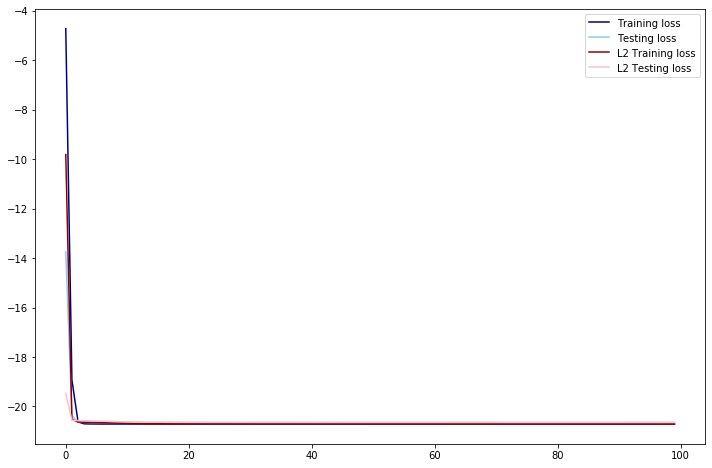

In [131]:
train_loss_l2 = history_l2.history['loss']
test_loss_l2 = history_l2.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2 Training loss', color='darkred')
plt.plot(test_loss_l2, label='L2 Testing loss', color='pink')
plt.legend();

In [132]:
history_l2.history['acc'][-1], history_l2.history['val_acc'][-1]

(0.14256817, 0.1510813683271408)